# Cyfrowe przetwarzanie obrazów i sygnałów
## Ćwiczenie 4 
Celem ćwiczenia jest praktyczne wypróbowanie działania filtrów w celu wyeliminowania niepożądanych zakłóceń z sygnału EKG. Proszę wybrać rodzaj filtra do eksperymentowania, np. Butterwortha lub Czebyszewa. Do filtracji wykorzystać gotowe funkcje z biblioteki scipy.signal. Biblioteka posiada również funkcje wspomagające projektowanie filtrów, które można zastosować.
### Autorzy: 
 Kinga Marek 235 280,  
 Mariusz Wiśniewski 241 393

### Zadanie 1  

Wczytaj sygnał ekgnoise.txt i zauważ zakłócenia nałożone na sygnał. Wykreślić częstotliwościową charakterystykę amplitudową sygnału.

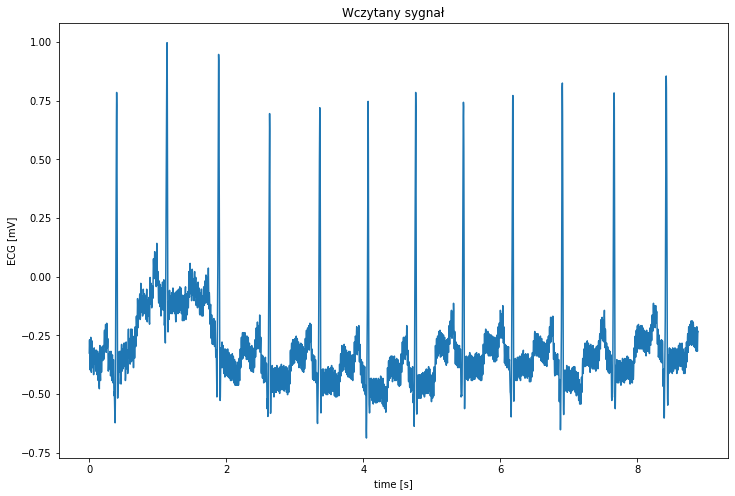

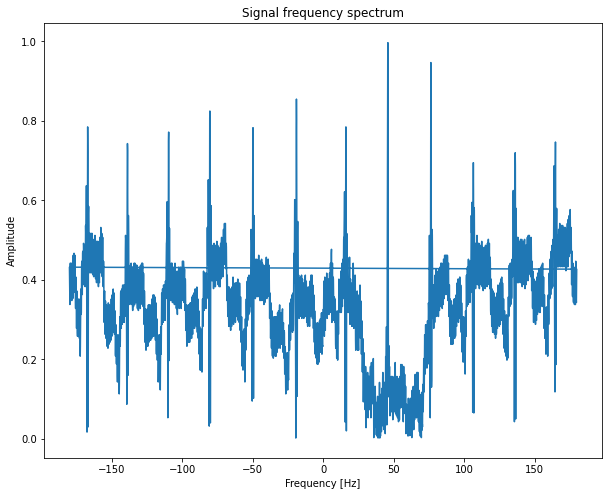

In [82]:
import matplotlib.pyplot as plt
import numpy as np 
import mpld3
mpld3.enable_notebook()

fs = 360 
data = np.loadtxt("Data/ekg_noise.txt")
data = np.hsplit(data, 2)

plt.rcParams['figure.figsize']=[12,8]
plt.plot(data[0], data[1])
plt.xlabel("time [s]")
plt.ylabel("ECG [mV]")
plt.title("Wczytany sygnał")
plt.show()

fft_amplitude = np.abs(np.fft.fft(data[1]))
fft_freq = np.fft.fftfreq(len(data[1]), 1/fs)

plt.rcParams['figure.figsize']=[10,8]
plt.plot(fft_freq, fft_amplitude)
plt.title('Signal frequency spectrum')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.show()

### Zadanie 3

Zbadaj filtr dolnoprzepustowy o częstotliwości granicznej 60 Hz w celu redukcji zakłóceń pochodzących z sieci zasilającej.  Wyznacz parametry filtra, wykreśl jego charakterystykę (zależność tłumienia od częstotliwości), przebieg sygnału po filtracji oraz jego widmo.  Można też wyznaczyć różnicę między sygnałem przed i po filtracji i widmo tej różnicy.

/home/km/CPSO/venv/lib/python3.8/site-packages/mpld3/mplexporter/exporter.py:84: UserWarning: Blended transforms not yet supported. Zoom behavior may not work as expected.
  warnings.warn("Blended transforms not yet supported. "


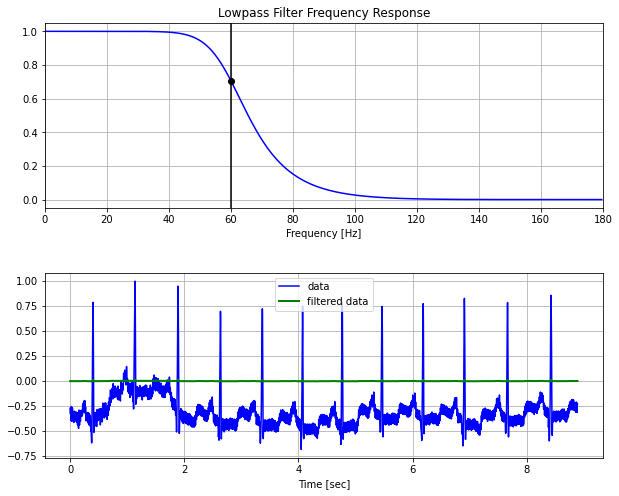

In [65]:
import numpy as np
from scipy.signal import butter, lfilter, freqz

def butter_coefficients(cutoff, fs, btype, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype=btype, analog=False)
    return b, a

def butter_filter(data, cutoff, fs, btype, order=5):
    b, a = butter_coefficients(cutoff, fs, btype, order=order)
    y = lfilter(b, a, data)
    return y

# filter requirements
fs = 360.0       
cutoff = 60

# Get the filter coefficients so we can check its frequency response.
b, a = butter_coefficients(cutoff, fs, 'lowpass')

# Plot the frequency response.
w, h = freqz(b, a)
plt.subplot(2, 1, 1)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Lowpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()

# Demonstrate the use of the filter.
y = butter_filter(data[1], cutoff, fs, 'lowpass')

plt.subplot(2, 1, 2)
plt.plot(data[0], data[1], 'b-', label='data')
plt.plot(data[0], y, 'g-', linewidth=2, label='filtered data')
plt.xlabel('Time [sec]')
plt.grid()
plt.legend()

plt.subplots_adjust(hspace=0.35)
plt.show()

### Zadanie 3

Zastosuj następnie, do sygnału otrzymanego w punkcie 2, filtr górnoprzepustowyo częstotliwości granicznej 5 Hz w celu eliminacji pływania linii izoelektrycznej.Sporządź wykresy sygnałów jak w punkcie 2.


/home/km/CPSO/venv/lib/python3.8/site-packages/mpld3/mplexporter/exporter.py:84: UserWarning: Blended transforms not yet supported. Zoom behavior may not work as expected.
  warnings.warn("Blended transforms not yet supported. "


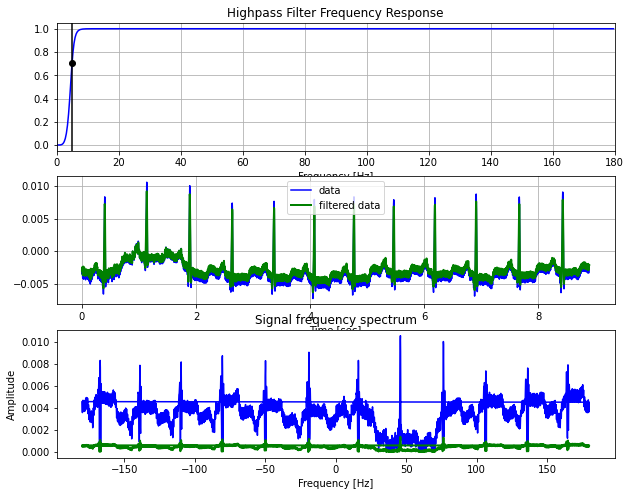

<Figure size 720x576 with 0 Axes>

In [89]:
# Change some filter requirements  
cutoff = 5

# Get the filter coefficients so we can check its frequency response.
b, a = butter_coefficients(cutoff, fs, 'highpass')

# Plot the frequency response.
w, h = freqz(b, a)
plt.subplot(3, 1, 1)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Highpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()

# Demonstrate the use of the filter.
double_filtered_y = butter_filter(y, cutoff, fs, 'highpass')

plt.subplot(3, 1, 2)
plt.plot(data[0], y, 'b-', label='data')
plt.plot(data[0], double_filtered_y, 'g-', linewidth=2, label='filtered data')
plt.xlabel('Time [sec]')
plt.grid()
plt.legend()

fft_amplitude2 = np.abs(np.fft.fft(y-double_filtered_y))
fft_amplitude2_diff = np.abs(np.fft.fft(y))

plt.subplot(3, 1, 3)
plt.rcParams['figure.figsize']=[10,8]

plt.plot(fft_freq, fft_amplitude2_diff, 'b-', label='data')
plt.plot(fft_freq, fft_amplitude2, 'g-', linewidth=2, label='filtered data')
plt.title('Signal frequency spectrum')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.show()

plt.subplots_adjust(hspace=0.35)
plt.show()